In [173]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style()

In [174]:
train =pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
y_train=train['label']
print(f'The size of training data is {train.shape[0]} and that of test data is {test.shape[0]}')

The size of training data is 42000 and that of test data is 28000


In [175]:
y_train

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64

In [176]:
x_train=train.drop('label',axis=1).values
x_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

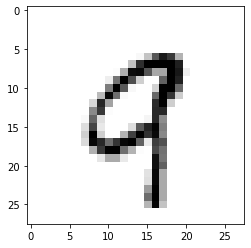

In [177]:
plt.imshow(x_train[41999].reshape(28,28),cmap='binary')
plt.show()

In [178]:
x_train=x_train.reshape(42000,28,28)

In [179]:
x_train.shape

(42000, 28, 28)

In [180]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=0.10,random_state=19)

In [181]:
x_train.shape

(37800, 28, 28)

In [182]:
x_val.shape

(4200, 28, 28)

In [183]:
from tensorflow.keras.utils import to_categorical
y_cat_train=to_categorical(y_train,num_classes=10)
y_cat_val=to_categorical(y_val,num_classes=10)

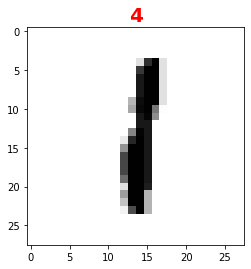

In [184]:
random_image=x_train[78]
random_label=y_train[78]
plt.imshow(random_image,cmap='binary')
plt.title(random_label,fontsize=20,weight='bold',color='red')
plt.show()

In [185]:
random_image.max()

255

In [186]:
random_image.min()

0

In [187]:
x_train_scaled=x_train/255
x_val_scaled=x_val/255

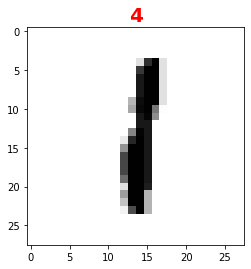

In [188]:
plt.imshow(x_train_scaled[78],cmap='binary')
plt.title(y_train[78],fontsize=20,weight='bold',color='red')
plt.show()

In [189]:
x_train_final = x_train_scaled.reshape(x_train_scaled.shape[0],28,28,1)
x_val_final = x_val_scaled.reshape(x_val_scaled.shape[0],28,28,1)

In [190]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout

In [191]:
# Define the optimizer
from keras.optimizers import RMSprop
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

In [192]:
model=Sequential()
model.add(Conv2D(filters=32,kernel_size=(5,5),strides=(1,1),input_shape=(28,28,1),padding='Same',activation='relu'))
model.add(Conv2D(filters=32,kernel_size=(5,5),strides=(1,1),input_shape=(28,28,1),padding='Same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),input_shape=(28,28,1),padding='Same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),input_shape=(28,28,1),padding='Same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [193]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop= EarlyStopping(monitor='val_loss',patience=2)

In [194]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [195]:
image_gen=ImageDataGenerator(rotation_range=10,width_shift_range=0.1,height_shift_range=0.1,shear_range=0.1,zoom_range=0.1,fill_mode='nearest')

In [196]:
train_image_gen=image_gen.fit(x_train_final)

In [197]:
train_image_gen

In [200]:
# Set a learning rate annealer
from keras.callbacks import ReduceLROnPlateau
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [201]:
model.fit_generator(image_gen.flow(x_train_final,y_cat_train),epochs=30,validation_data=(x_val_final,y_cat_val),callbacks=[learning_rate_reduction])

Epoch 1/30
1182/1182 [==============================] - 167s 141ms/step - loss: 0.0928 - accuracy: 0.9733 - val_loss: 0.0506 - val_accuracy: 0.9886 - lr: 0.0010
Epoch 2/30
1182/1182 [==============================] - 185s 156ms/step - loss: 0.0793 - accuracy: 0.9772 - val_loss: 0.0436 - val_accuracy: 0.9893 - lr: 0.0010
Epoch 3/30
1182/1182 [==============================] - 191s 162ms/step - loss: 0.0735 - accuracy: 0.9784 - val_loss: 0.0320 - val_accuracy: 0.9912 - lr: 0.0010
Epoch 4/30
1182/1182 [==============================] - 184s 156ms/step - loss: 0.0675 - accuracy: 0.9808 - val_loss: 0.0316 - val_accuracy: 0.9912 - lr: 0.0010
Epoch 5/30
1182/1182 [==============================] - 191s 162ms/step - loss: 0.0593 - accuracy: 0.9820 - val_loss: 0.0368 - val_accuracy: 0.9879 - lr: 0.0010
Epoch 6/30
1182/1182 [==============================] - 158s 134ms/step - loss: 0.0599 - accuracy: 0.9826 - val_loss: 0.0284 - val_accuracy: 0.9914 - lr: 0.0010
Epoch 7/30
1182/1182 [============

In [202]:
metrics=pd.DataFrame(model.history.history)
metrics

,loss,accuracy,val_loss,val_accuracy,lr
0,0.092779,0.973333,0.050607,0.988571,0.001000
1,0.079266,0.977249,0.043573,0.989286,0.001000
2,0.073548,0.978386,0.031954,0.991190,0.001000
3,0.067501,0.980794,0.031600,0.991190,0.001000
4,0.059331,0.982037,0.036806,0.987857,0.001000
5,0.059882,0.982593,0.028362,0.991429,0.001000
6,0.054294,0.983651,0.035403,0.990238,0.001000
7,0.052775,0.983889,0.036283,0.991190,0.001000
8,0.054025,0.984365,0.050575,0.988095,0.001000
9,0.038831,0.989127,0.031264,0.991905,0.000500


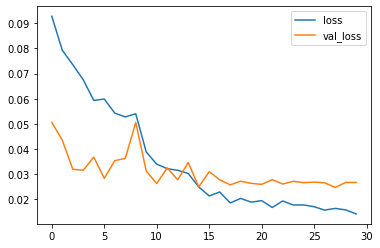

In [203]:
metrics[['loss' , 'val_loss']].plot()
plt.show()

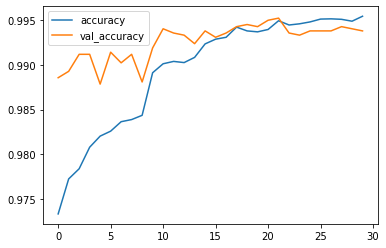

In [204]:
metrics[['accuracy' , 'val_accuracy']].plot()
plt.show()

In [205]:
model.evaluate(x_val_final, y_cat_val, verbose=0)

[0.026748649775981903, 0.9938095211982727]

In [206]:
y_pred=model.predict_classes(x_val_final)
y_pred

array([7, 7, 5, ..., 8, 1, 4], dtype=int64)

In [207]:
from sklearn.metrics import classification_report ,confusion_matrix
print('Classification Report')
print(classification_report(y_val,y_pred))
print('\n')
print('Confusion Matrix')
print(confusion_matrix(y_val,y_pred))

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       417
           1       0.99      1.00      1.00       476
           2       1.00      0.99      1.00       384
           3       1.00      0.99      1.00       451
           4       1.00      0.99      1.00       391
           5       0.99      0.99      0.99       424
           6       0.99      0.99      0.99       403
           7       1.00      1.00      1.00       470
           8       0.99      0.99      0.99       383
           9       0.98      1.00      0.99       401

    accuracy                           0.99      4200
   macro avg       0.99      0.99      0.99      4200
weighted avg       0.99      0.99      0.99      4200



Confusion Matrix
[[414   0   0   0   0   0   3   0   0   0]
 [  0 475   1   0   0   0   0   0   0   0]
 [  0   0 382   0   0   0   0   1   1   0]
 [  0   1   0 448   0   0   0   0   0   2]
 [  0   1   0   0 389   0   

Prediction:
4


<function matplotlib.pyplot.show(*args, **kw)>

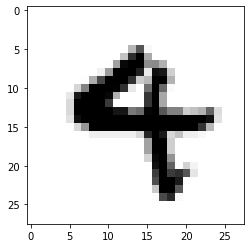

In [208]:
np.random.seed(22)
random_selection=np.random.randint(0,4201,size=1)
random_sample=x_val_final[random_selection]
print('Prediction:')
print(model.predict_classes(random_sample.reshape(1,28,28,1))[0])
plt.imshow(random_sample.reshape(28,28),cmap='binary')
plt.show

Prediction:
9


<function matplotlib.pyplot.show(*args, **kw)>

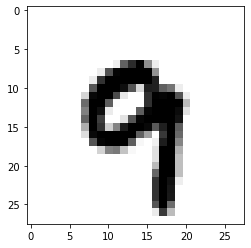

In [209]:
np.random.seed(20)
random_selection=np.random.randint(0,4201,size=1)
random_sample=x_val_final[random_selection]
print('Prediction:')
print(model.predict_classes(random_sample.reshape(1,28,28,1))[0])
plt.imshow(random_sample.reshape(28,28),cmap='binary')
plt.show

Prediction:
1


<function matplotlib.pyplot.show(*args, **kw)>

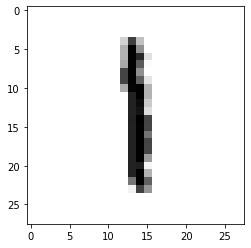

In [210]:
np.random.seed(19)
random_selection=np.random.randint(0,4201,size=1)
random_sample=x_val_final[random_selection]
print('Prediction:')
print(model.predict_classes(random_sample.reshape(1,28,28,1))[0])
plt.imshow(random_sample.reshape(28,28),cmap='binary')
plt.show

In [211]:
# Reshaping test data
x_test = test.values
x_test = x_test.reshape(28000,28,28)
x_test.shape

(28000, 28, 28)

In [212]:
x_test_scaled=x_test/255

In [213]:
test_predictions=model.predict_classes(x_test_scaled.reshape(28000,28,28,1))

In [214]:
test_predictions

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

In [215]:
output=pd.DataFrame({'ImageId':test.index+1,'Label':test_predictions})
output.to_csv('new_submission.csv',index=False)